In [4]:
import sys
sys.path.append("../")
from data_loaders.data_loader_pannuke import Load_Bbox_nuclei
from matplotlib import pyplot as plt
import pandas as pd
train_file = "/home/humanoid/internalHD/WORKS_HD/autoprom/dataset/train_df.csv"
test_file = "/home/humanoid/internalHD/datasets/multiclass/nucleai_seg/pannuke_split/test_df.csv"
train_loader = Load_Bbox_nuclei(mode="train",csv_file=train_file)
# test_loader = Load_Bbox_nuclei(mode="test",csv_file=test_file)

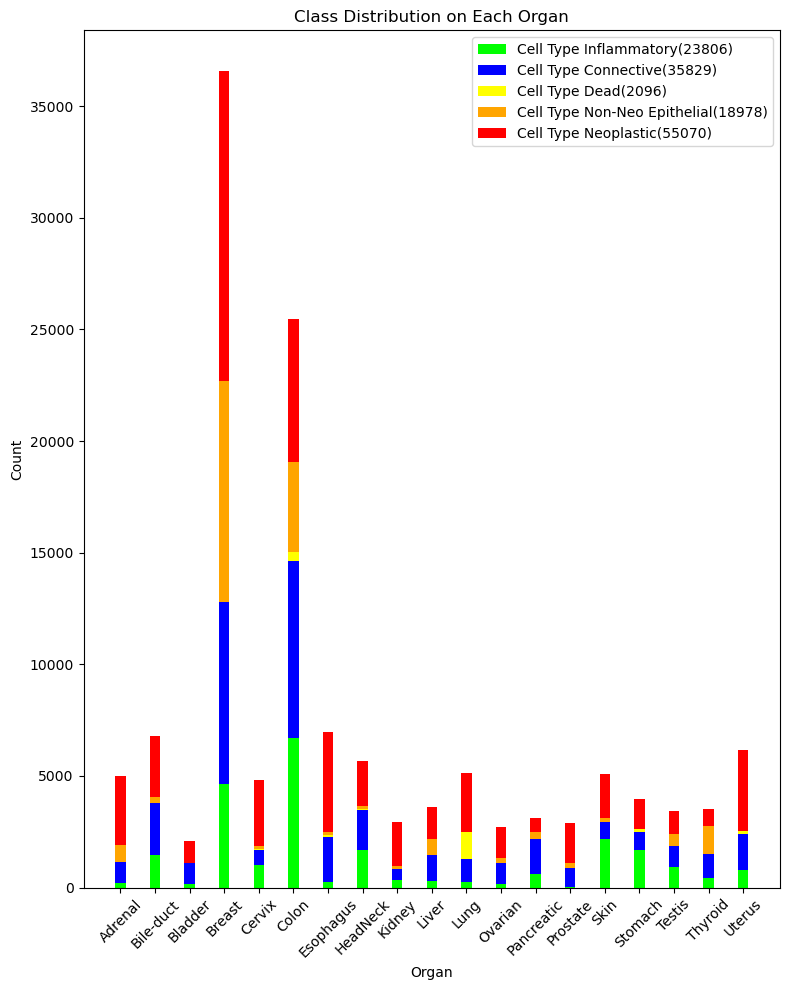

In [11]:
# Flatten the list of classes for each image
from matplotlib import pyplot as plt
df = train_loader.df.copy()
df['Label'] = df['Label'].apply(eval)
df['Organ'] = df['Image_File'].apply(lambda x: x.split("/")[-1].split("_")[1])
organ_cell_counts = df.explode('Label').groupby(['Organ', 'Label']).size().reset_index(name='Count')
# Define different colors for each cell type
#['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
colors = [    # Red
    (0.0, 1.0, 0.0),    # Green
    (0.0, 0.0, 1.0),    # Blue
    (1.0, 1.0, 0.0),    # Orange
    (1.0, 0.647, 0.0),    # Indigo
    (1.0, 0.0, 0.0),
    ]
cell_colors = {
    1: (0.0, 1.0, 0.0),
    2: (0.0, 0.0, 1.0),
    3: (1.0, 1.0, 0.0),
    4: (1.0, 0.647, 0.0),
    5: (1.0, 0.0, 0.0),
    # Add more cell types and their respective colors if needed
}
type = ["Inflammatory","Connective","Dead","Non-Neo Epithelial","Neoplastic"]

# Create the bar plot

plt.figure(figsize=(8, 10))

# Group data by 'Organ' and 'Label' and sum the counts for each combination
grouped_data = organ_cell_counts.groupby(['Organ', 'Label'])['Count'].sum().reset_index()

# Pivot the data to have 'Organ' as rows and 'Label' as columns
pivoted_data = grouped_data.pivot(index='Organ', columns='Label', values='Count').fillna(0)

# Get the list of organ names for x-axis
organs = pivoted_data.index

# Get the list of cell types (columns in the pivoted data)
cell_types = pivoted_data.columns

# Initialize the bottom of the bars
bottom = [0] * len(organs)

# Plot each cell type's counts as a stacked bar
for cell_type, color in cell_colors.items():
    cell_t = type[cell_type-1]
    counts = pivoted_data[cell_type].values
    plt.bar(organs, counts, bottom=bottom, color=color, label=f"Cell Type {cell_t}({int(sum(counts))})",width=0.3)
    bottom = [b + c for b, c in zip(bottom, counts)]

# Set plot labels and title
plt.title('Class Distribution on Each Organ')
plt.xlabel('Organ')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add a legend to the plot
plt.legend()

# Display the plot
plt.tight_layout()
plt.savefig("dataset_stats.png", bbox_inches='tight', dpi=300)
plt.show()


In [7]:
grouped_data

,Organ,Label,Count
0,Adrenal,1,217
1,Adrenal,2,934
2,Adrenal,3,5
3,Adrenal,4,761
4,Adrenal,5,3077
...,...,...,...
81,Uterus,1,801
82,Uterus,2,1605
83,Uterus,3,105
84,Uterus,4,40
